In [1]:
import pandas as pd
import numpy as np
pd.pandas.set_option("display.max_columns",None)
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df=df.drop(labels=['ID'],axis=1)

#### Independent and dependent features

In [4]:
x = df.drop(labels=['default.payment.next.month'],axis=1)
y = df[['default.payment.next.month']]

In [5]:
x.shape

(30000, 23)

In [6]:
numerical_cols = x.select_dtypes(exclude='object').columns

In [7]:
numerical_cols

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [8]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols)
])

#### Train test split

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [10]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [11]:
smote=SMOTE()
x_rec,y_rec=smote.fit_resample(x_train,y_train)

In [12]:
y_train.value_counts()    

default.payment.next.month
0                             16300
1                              4700
Name: count, dtype: int64

In [13]:
y_rec.value_counts()    

default.payment.next.month
0                             16300
1                             16300
Name: count, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
import numpy as np
def evaluate_model(true, predicted):
    Accuracy_score = accuracy_score(true,predicted)
    return Accuracy_score

In [16]:
## Train multiple models

models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier()
}
trained_model_list=[]
model_list=[]
accuracy_train = []
accuracy_list=[]
y_predict = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_rec,y_rec)

    #Make Predictions
    y_train_pred = model.predict(x_rec)
    y_pred=model.predict(x_test)
    

    Accuracy_train=evaluate_model(y_rec,y_train_pred)
    Accuracy=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    y_predict.append(y_pred)

    print('Model Training Performance')
    print("Accuracy_train:",Accuracy_train*100)
    print("Accuracy:",Accuracy*100)

    accuracy_train.append(Accuracy_train)
    accuracy_list.append(Accuracy)
    
    print('='*35)
    print('\n')

e:\credit card pred\cc_pred\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression
Model Training Performance
Accuracy_train: 67.48466257668711
Accuracy: 67.11111111111111


DecisionTree
Model Training Performance
Accuracy_train: 99.96932515337423
Accuracy: 70.27777777777777




C:\Users\shreyash12\AppData\Local\Temp\ipykernel_4420\2735703180.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_rec,y_rec)


RandomForest
Model Training Performance
Accuracy_train: 99.96625766871165
Accuracy: 79.34444444444443




In [17]:
df1 = pd.DataFrame({'model':model_list,'train_accuracy':accuracy_train,'test_accuracy':accuracy_list})

In [18]:
df1

,model,train_accuracy,test_accuracy
0,LogisticRegression,0.674847,0.671111
1,DecisionTree,0.999693,0.702778
2,RandomForest,0.999663,0.793444


In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='model'>

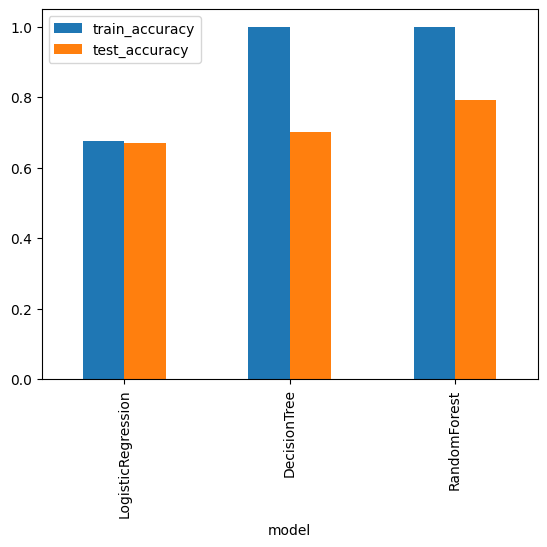

In [20]:
df1.plot(x='model',y=['train_accuracy','test_accuracy'],kind='bar')

## Hyperparameter Tuning

In [21]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# criterion
criteria = [ 'gini','entropy']

param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [22]:
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
rf_Grid = RandomizedSearchCV(estimator = rfc, param_distributions = param, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(x_rec,y_rec)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


e:\credit card pred\cc_pred\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
e:\credit card pred\cc_pred\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   verbose=2)

In [23]:
rf_Grid.best_params_

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [24]:
tr=[]
ts=[]
def build_model(model):
    model.fit(x_rec,y_rec)
    y_tr_pred= model.predict(x_rec)
    y_ts_pred=model.predict(x_test)
    train_acc=accuracy_score(y_rec,y_tr_pred)
    test_acc=accuracy_score(y_test,y_ts_pred)
    print("training accuracy:",train_acc)
    print("testing accuracy:",test_acc)
    tr.append(train_acc)
    ts.append(test_acc)

In [25]:
rfc=RandomForestClassifier(n_estimators= 115,
                           min_samples_split= 2,
                           min_samples_leaf = 1,
                            max_features =  'auto',
                            max_depth = 4,
                            bootstrap = True)
build_model(rfc)

C:\Users\shreyash12\AppData\Local\Temp\ipykernel_4420\390912160.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_rec,y_rec)
e:\credit card pred\cc_pred\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


training accuracy: 0.7240490797546012
testing accuracy: 0.7842222222222223
